In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Problem 1: Clustering

A leading bank wants to develop a customer segmentation to give promotional offers to its customers. They collected a sample that summarizes the activities of users during the past few months. You are given the task to identify the segments based on credit card usage.


1.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

1.2  Do you think scaling is necessary for clustering in this case? Justify

1.3 Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

1.4 Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

Data Dictionary for Market Segmentation:

1. spending: Amount spent by the customer per month (in 1000s)
2. advance_payments: Amount paid by the customer in advance by cash (in 100s)
3. probability_of_full_payment: Probability of payment done in full by the customer to the bank
4. current_balance: Balance amount left in the account to make purchases (in 1000s)
5. credit_limit: Limit of the amount in credit card (10000s)
6. min_payment_amt : minimum paid by the customer while making payments for purchases made monthly (in 100s)
7. max_spent_in_single_shopping: Maximum amount spent in one purchase (in 1000s) 

In [2]:
bank=pd.read_csv('bank_marketing_part1_Data-1.csv')

In [3]:
bank.head()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,19.94,16.92,0.8752,6.675,3.763,3.252,6.550
1,15.99,14.89,0.9064,5.363,3.582,3.336,5.144
2,18.95,16.42,0.8829,6.248,3.755,3.368,6.148
3,10.83,12.96,0.8099,5.278,2.641,5.182,5.185
4,17.99,15.86,0.8992,5.890,3.694,2.068,5.837


In [4]:
bank.shape

(210, 7)

bank Dataframe has 210 rows and 7 features in it representing the customers spending details.

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   spending                      210 non-null    float64
 1   advance_payments              210 non-null    float64
 2   probability_of_full_payment   210 non-null    float64
 3   current_balance               210 non-null    float64
 4   credit_limit                  210 non-null    float64
 5   min_payment_amt               210 non-null    float64
 6   max_spent_in_single_shopping  210 non-null    float64
dtypes: float64(7)
memory usage: 11.6 KB


As we check before it has 20 rows and 7 features
1. All the features are of Float data type.
2. Non of the features has null values in it.
3. Total memory usage by the dataframe is 11.6 KB

In [6]:
bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


There is plenty of information aca be interpreted from the above decribed data such as :
1. The minimum spending of customers are around 10000 and goes maximum upto 21000 .
2. There is 87 % chance that a customer will pay their full payment amount.
3. The Credit Limit of customers in the dataframe ranges between 26000 to 41000.
4. The customers spends good amount of money in a single shopping as there mean is really high around 5500.

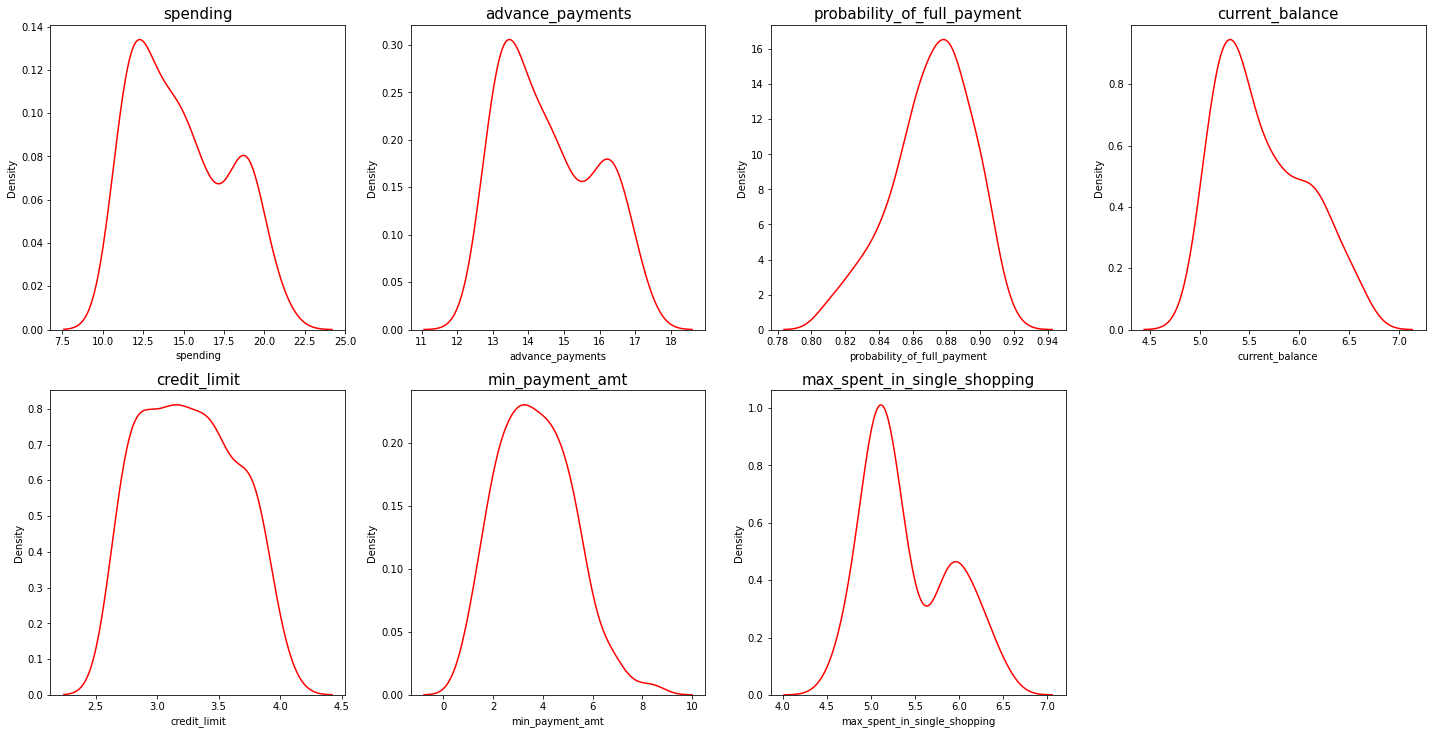

In [7]:
data_plot=bank
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.distplot(data_plot[data_plot.columns[i]],hist=False,color='Red')
    ax.set_title(data_plot.columns[i],color='black',fontdict={'fontsize':15})
plt.tight_layout()
plt.show();

In [8]:
from scipy.stats import skew
print("Skewness of Spending is",bank.spending.skew())
print("Skewness of advance_payments is",bank.advance_payments.skew())
print("Skewness of probability_of_full_payment is",bank.probability_of_full_payment.skew())
print("Skewness of current_balance is",bank.current_balance.skew())
print("Skewness of credit_limit is",bank.credit_limit.skew())
print("Skewness of min_payment_amt is",bank.min_payment_amt.skew())
print("Skewness of max_spent_in_single_shopping is",bank.max_spent_in_single_shopping.skew())

Skewness of Spending is 0.3998891917177586
Skewness of advance_payments is 0.3865727731912213
Skewness of probability_of_full_payment is -0.5379537283982823
Skewness of current_balance is 0.5254815601318906
Skewness of credit_limit is 0.1343782451316215
Skewness of min_payment_amt is 0.40166734329025183
Skewness of max_spent_in_single_shopping is 0.561897374954866


As we can check from the histogram plot and skewness stats that,

Spending, Advance_payment and Min_payment_amt is right skewed and has similar skewness values around 0.39

Current_balance and max_spent_in_single_shopping are highly right skewed as they have higher skewness values upto 0.52 and 0.56.

Credit_limit is almost normally distributed as its skewness value is very much close to zero 0.13

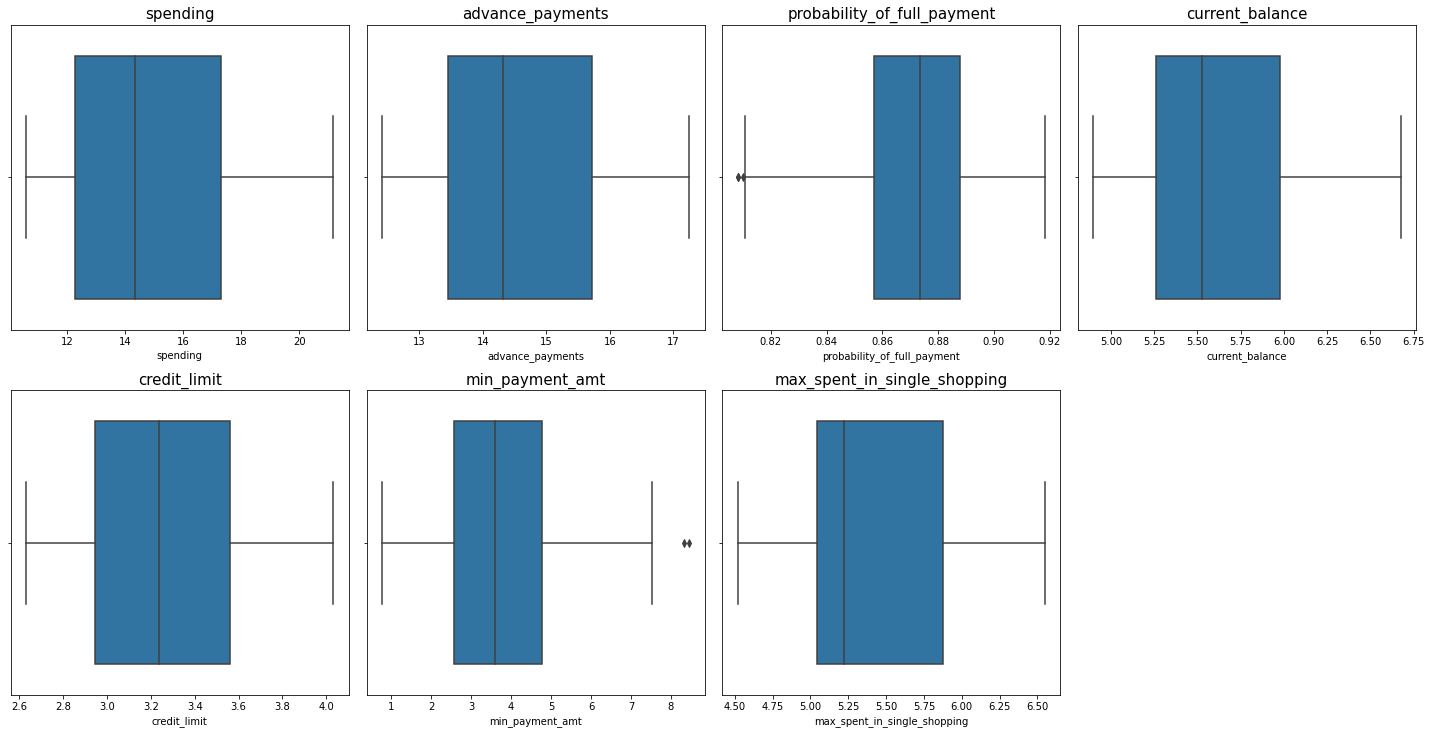

In [9]:
data_plot=bank
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]],orient="V")
    ax.set_title(data_plot.columns[i],color='black',fontdict={'fontsize':15})
plt.tight_layout()
plt.show();

As we can check the box plot of the features there are very few outliers prensent in the data only in two features that is probability_of_full_payment and min_payment_amt. In probability_of_full_payment maybe outliers represents some customers have very less probability of paying full amount where as in min_payment_amt outliers are customers who have paid much more than theier minimum amount.

Text(0.5, 1.0, 'Correlation between Features')

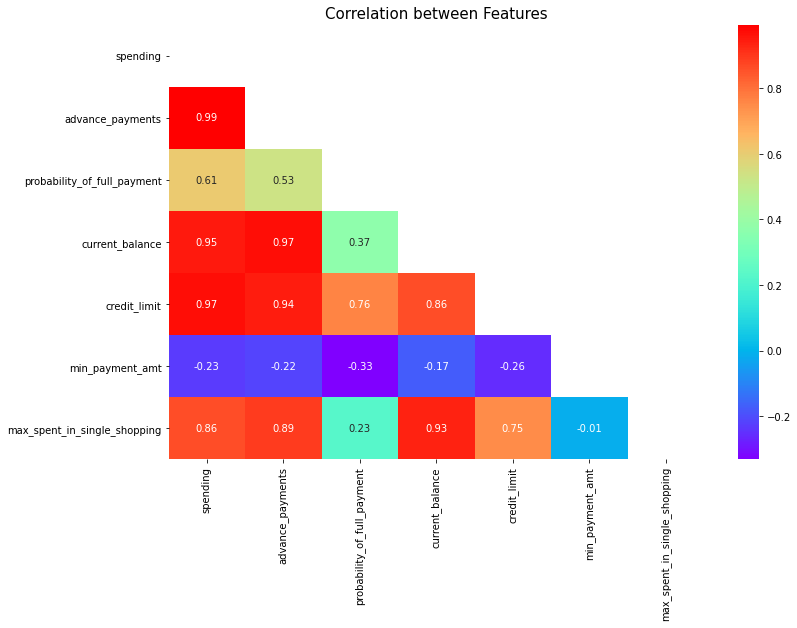

In [10]:
corr=bank.corr(method='pearson')
mask= np.triu(np.ones_like(corr,dtype=bool))
plt.figure(figsize=(12,8))
sns.heatmap(corr,annot=True,fmt='0.2f',mask=mask,cmap='rainbow')
plt.title('Correlation between Features', fontsize=15)

As we can check from correlation plot
1. There are some features who are hihgly correlated with each others such as 
       spending with advance_paymnets,
       spending-current_balance,
       spending-credit_limit 
   which reprents spending has very high impact on these features like if spending will increase curent balance increase and credit limit will decrease.
2. advance_payment is also higly correlated with credit_limit and current_limit as if a customer is doing advance payments then its current balance will reduce and credit limit will increase.
3. Current balance is also highly related with credit limit and max spent is single shopping.

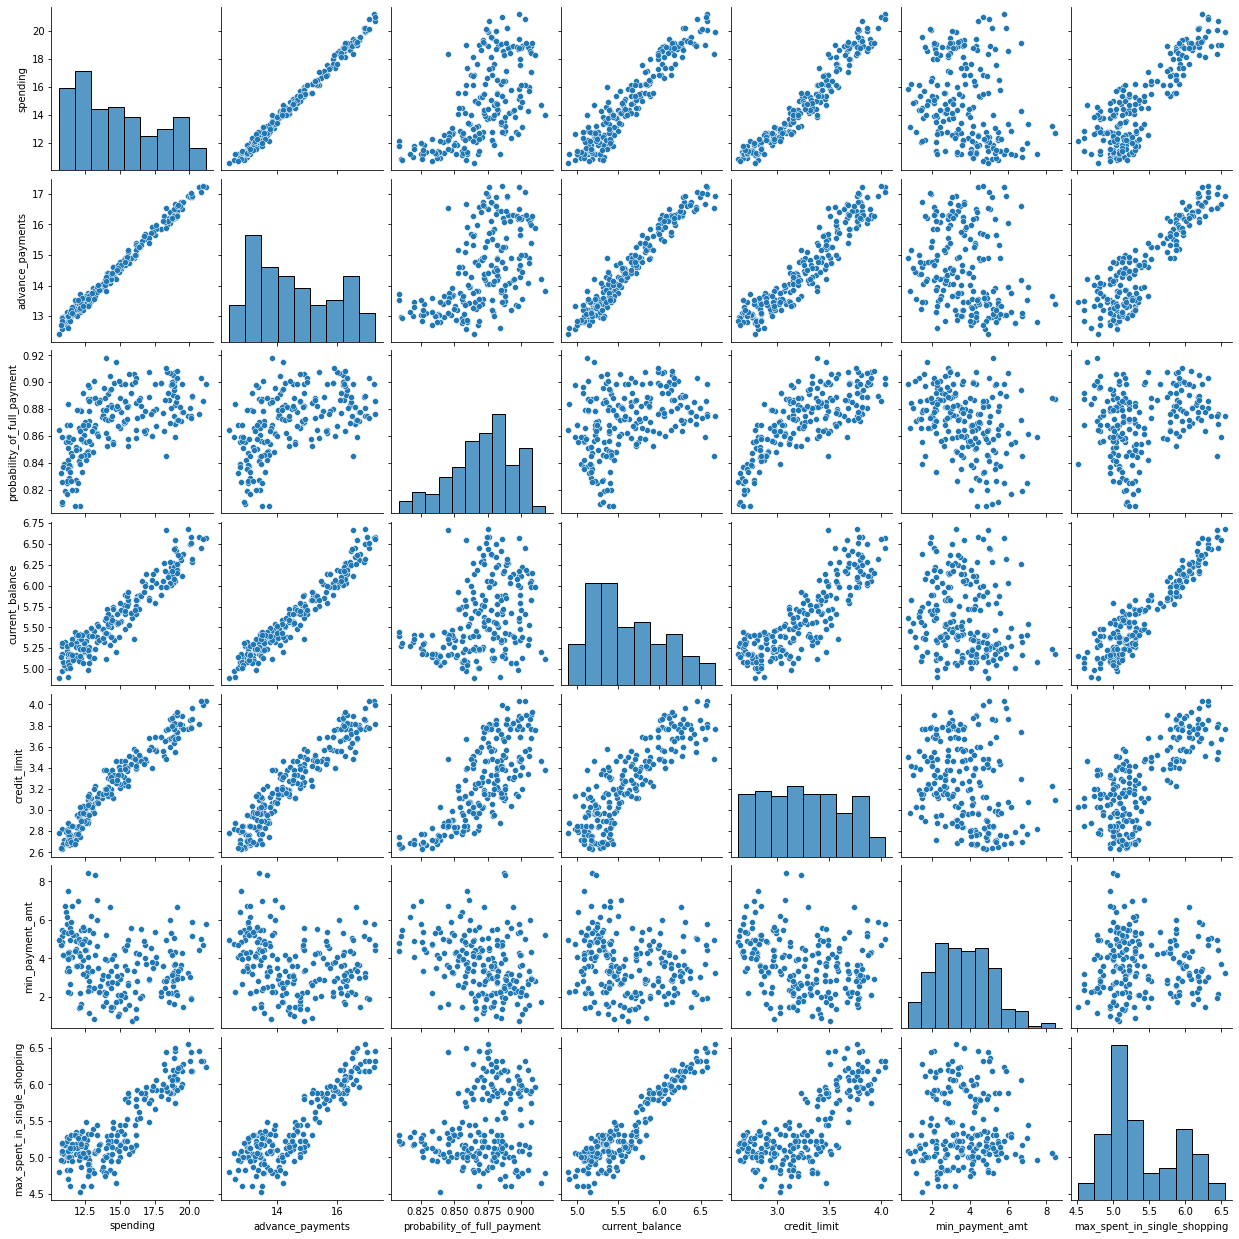

In [11]:
sns.pairplot(bank);

##### Q-1.2. Do you think scaling is necessary for clustering in this case? Justify

In [12]:
bank.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000


As we can check from the above descriotion of data dataframe needs to scaled because
1. All the features have different value ranges like some of them are in 1000s some of them in 100s and even one of them in 10000s.
2. From detail description of data we can check that their means are very distinctive from each other it ranges from 14.84 to 0.87.
3. As like mean standard deviation of each feature is also vary.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
sc=StandardScaler()
bank_scaled1= sc.fit_transform(bank)
bank_scaled1=pd.DataFrame(bank_scaled1,columns=bank.columns)
bank_scaled1

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.178230,2.367533,1.338579,-0.298806,2.328998
1,0.393582,0.253840,1.501773,-0.600744,0.858236,-0.242805,-0.538582
2,1.413300,1.428192,0.504874,1.401485,1.317348,-0.221471,1.509107
3,-1.384034,-1.227533,-2.591878,-0.793049,-1.639017,0.987884,-0.454961
4,1.082581,0.998364,1.196340,0.591544,1.155464,-1.088154,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.721222,-0.428801,-0.158181,0.190536,-1.366631
206,0.662292,0.814152,-0.305372,0.675253,0.476084,0.813214,0.789153
207,-0.281636,-0.306472,0.364883,-0.431064,-0.152873,-1.322158,-0.830235
208,0.438367,0.338271,1.230277,0.182048,0.600814,-0.953484,0.071238


In [15]:
bank_scaled1.describe()

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
count,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02,2.100000e+02
mean,9.148766e-16,1.097006e-16,1.243978e-15,-1.089076e-16,-2.994298e-16,5.302637e-16,-1.935489e-15
std,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00,1.002389e+00
min,-1.466714e+00,-1.649686e+00,-2.668236e+00,-1.650501e+00,-1.668209e+00,-1.956769e+00,-1.813288e+00
25%,-8.879552e-01,-8.514330e-01,-5.980791e-01,-8.286816e-01,-8.349072e-01,-7.591477e-01,-7.404953e-01
50%,-1.696741e-01,-1.836639e-01,1.039927e-01,-2.376280e-01,-5.733534e-02,-6.746852e-02,-3.774588e-01
75%,8.465989e-01,8.870693e-01,7.116771e-01,7.945947e-01,8.044956e-01,7.123789e-01,9.563941e-01
max,2.181534e+00,2.065260e+00,2.006586e+00,2.367533e+00,2.055112e+00,3.170590e+00,2.328998e+00


We used Standard Scaler (Z score) method to scale the data. It converts the data of each features to Mean = 0 and Standard Deviation = 1

This method measures the distance of each datapoint in the form of standard deviation from its mean and gives them a value which brings all the data points to one scale.


##### Q-1.3 -  Apply hierarchical clustering to scaled data. Identify the number of optimum clusters using Dendrogram and briefly describe them

In [16]:
from scipy.cluster.hierarchy import dendrogram , linkage,fcluster

In [17]:
def remove_outliers(col):
    Q1,Q3=np.percentile(col,[25,75])
    IQR = Q3-Q1
    lower = Q1-(1.5*IQR)
    upper = Q3+(1.5*IQR)
    return lower,upper

In [18]:
lr,ur=remove_outliers(bank['probability_of_full_payment'])
bank['probability_of_full_payment']=np.where(bank['probability_of_full_payment']>ur,ur,bank['probability_of_full_payment'])
bank['probability_of_full_payment']=np.where(bank['probability_of_full_payment']<lr,lr,bank['probability_of_full_payment'])
lr,ur=remove_outliers(bank['min_payment_amt'])
bank['min_payment_amt']=np.where(bank['min_payment_amt']<lr,lr,bank['min_payment_amt'])
bank['min_payment_amt']=np.where(bank['min_payment_amt']>ur,ur,bank['min_payment_amt'])

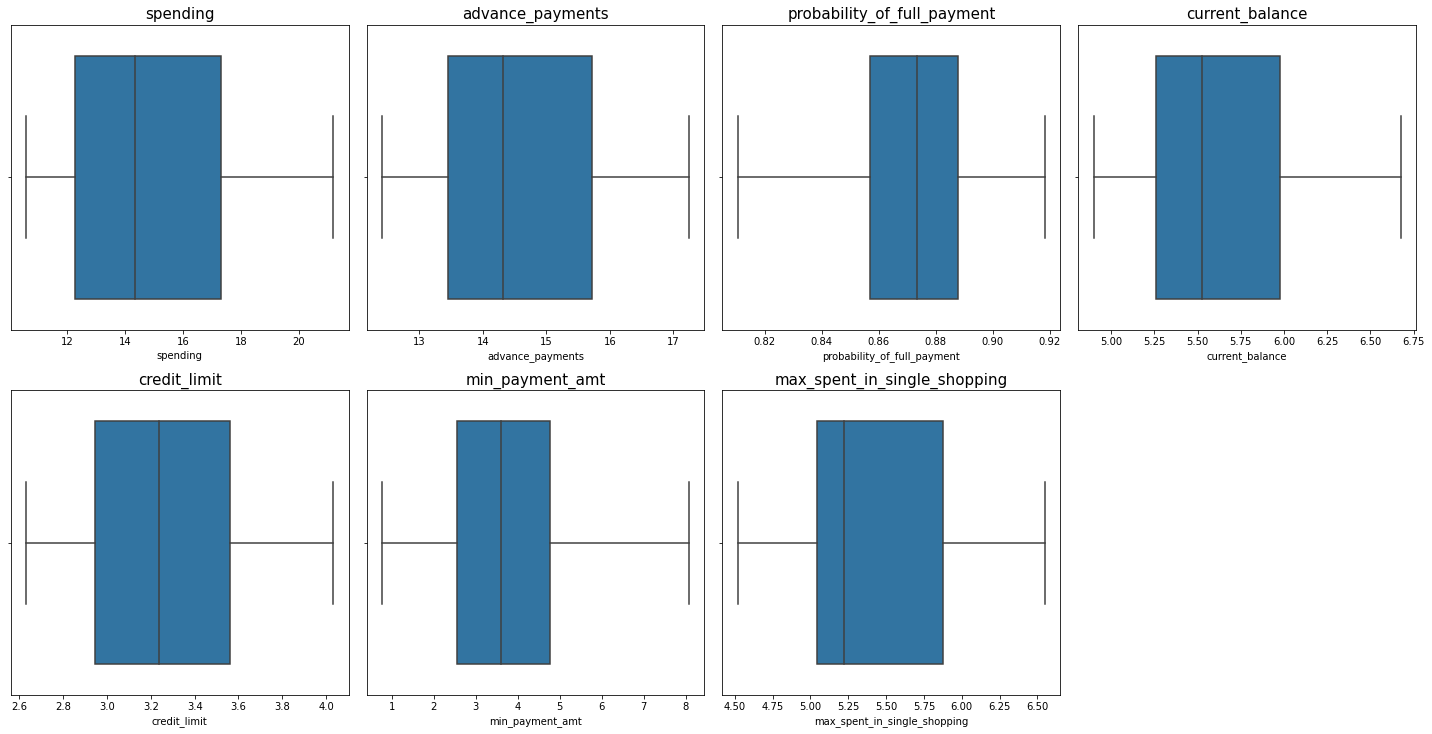

In [19]:
data_plot=bank
fig=plt.figure(figsize=(20,20))
for i in range(0,len(data_plot.columns)):
    ax=fig.add_subplot(4,4,i+1)
    sns.boxplot(data_plot[data_plot.columns[i]],orient="V")
    ax.set_title(data_plot.columns[i],color='black',fontdict={'fontsize':15})
plt.tight_layout()
plt.show();

In [20]:
bank_scaled=sc.fit_transform(bank)

In [21]:
bank_scaled=pd.DataFrame(bank_scaled,columns=bank.columns)
bank_scaled

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping
0,1.754355,1.811968,0.177628,2.367533,1.338579,-0.298625,2.328998
1,0.393582,0.253840,1.505071,-0.600744,0.858236,-0.242292,-0.538582
2,1.413300,1.428192,0.505234,1.401485,1.317348,-0.220832,1.509107
3,-1.384034,-1.227533,-2.571391,-0.793049,-1.639017,0.995699,-0.454961
4,1.082581,0.998364,1.198738,0.591544,1.155464,-1.092656,0.874813
...,...,...,...,...,...,...,...
205,-0.329866,-0.413929,0.722220,-0.428801,-0.158181,0.193620,-1.366631
206,0.662292,0.814152,-0.307399,0.675253,0.476084,0.819993,0.789153
207,-0.281636,-0.306472,0.364831,-0.431064,-0.152873,-1.328049,-0.830235
208,0.438367,0.338271,1.232775,0.182048,0.600814,-0.957188,0.071238


In [22]:
wardlink=linkage(bank,method='ward')

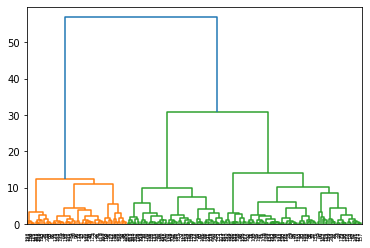

In [23]:
dend=dendrogram(wardlink)

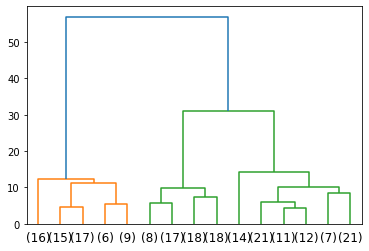

In [24]:
dend=dendrogram(wardlink,truncate_mode='lastp',p=15)

In [25]:
clusters=fcluster(wardlink,3,criterion='maxclust')
clusters

array([1, 2, 1, 3, 1, 3, 3, 2, 1, 3, 1, 2, 3, 1, 3, 3, 2, 3, 3, 3, 3, 3,
       1, 3, 2, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3, 1, 1, 2, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 3, 3, 2, 2, 1,
       1, 2, 1, 3, 2, 3, 1, 1, 3, 1, 2, 3, 1, 2, 2, 3, 2, 1, 3, 2, 2, 2,
       1, 3, 3, 1, 2, 3, 3, 1, 1, 1, 3, 1, 3, 1, 2, 1, 2, 1, 1, 3, 3, 1,
       2, 2, 1, 3, 3, 1, 2, 3, 3, 1, 3, 3, 3, 3, 2, 2, 1, 3, 2, 2, 3, 2,
       3, 1, 3, 1, 1, 3, 1, 2, 2, 2, 3, 3, 3, 3, 1, 3, 2, 3, 2, 3, 2, 2,
       3, 2, 3, 3, 2, 1, 1, 3, 1, 1, 1, 3, 2, 2, 3, 3, 2, 3, 2, 1, 1, 1,
       2, 3, 2, 3, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3, 3, 2, 3, 1, 2, 1, 1, 3,
       1, 3, 2, 2, 2, 3, 1, 2, 1, 2, 2, 2], dtype=int32)

In [26]:
bank_h=bank
bank_h['Clusters']=clusters
bank_h

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.888000,5.439,3.199,3.986,4.738,2
206,16.77,15.62,0.863800,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.879600,5.438,3.201,1.717,5.001,2
208,16.12,15.00,0.900000,5.709,3.485,2.270,5.443,2


#### Cluster Profiling


In [27]:
bank_Hcluster=bank_h.iloc[:,0:8].groupby('Clusters').mean()
bank_Hcluster['Freq']=bank_h.Clusters.value_counts().sort_index()
bank_Hcluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clusters,,,,,,,,
1,18.615873,16.259524,0.883937,6.194603,3.708143,3.659413,6.060952,63
2,14.920164,14.579344,0.881487,5.608033,3.314852,2.684805,5.221951,61
3,12.035465,13.299535,0.854146,5.228395,2.889395,4.443190,5.061814,86


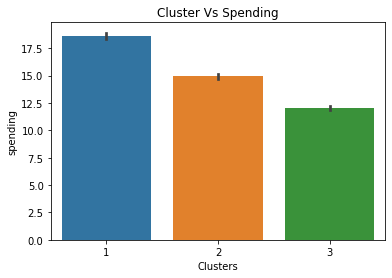

In [28]:
sns.barplot(x="Clusters",y='spending',data=bank)
plt.title('Cluster Vs Spending');

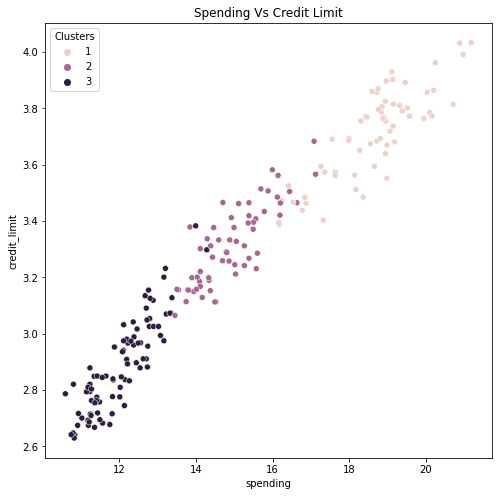

In [29]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='spending',y='credit_limit',hue='Clusters',data=bank_h,)
plt.title('Spending Vs Credit Limit');

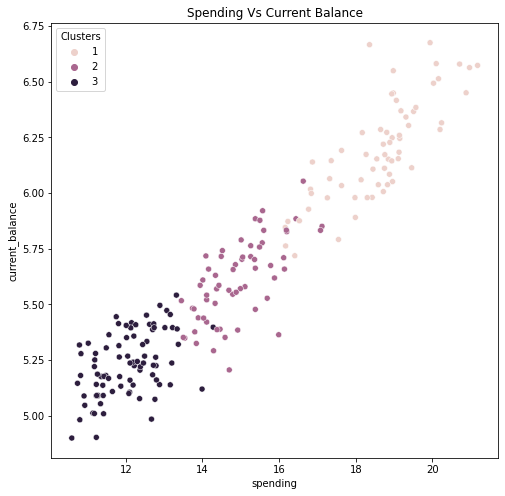

In [30]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='spending',y='current_balance',hue='Clusters',data=bank_h,)
plt.title('Spending Vs Current Balance');

##### Q-1.4 - Apply K-Means clustering on scaled data and determine optimum clusters. Apply elbow curve and silhouette score. Explain the results properly. Interpret and write inferences on the finalized clusters.

In [31]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#### Creating Cluster Using KMeans

In [32]:
kmeans=KMeans(n_clusters=2,random_state= 1)
kmeans.fit(bank_scaled)
print(kmeans.inertia_)
print(silhouette_score(bank_scaled,kmeans.labels_))

659.14740095485
0.46560100442748986


##### Forming Clusters with (1,2,3,4,5,6)

In [33]:
kmeans=KMeans(n_clusters=1,random_state= 1)
kmeans.fit(bank_scaled)
kmeans.inertia_

1469.999999999999

In [34]:
kmeans=KMeans(n_clusters=3,random_state= 1)
kmeans.fit(bank_scaled)
print(kmeans.inertia_)
print(silhouette_score(bank_scaled,kmeans.labels_))

430.298481751223
0.4008059221522216


In [35]:
kmeans=KMeans(n_clusters=4,random_state= 1)
kmeans.fit(bank_scaled)
print(kmeans.inertia_)
print(silhouette_score(bank_scaled,kmeans.labels_))

371.2217639268478
0.32943733699973826


In [36]:
kmeans=KMeans(n_clusters=5,random_state= 1)
kmeans.fit(bank_scaled)
print(kmeans.inertia_)
print(silhouette_score(bank_scaled,kmeans.labels_))

326.88464076818576
0.28648737247296063


In [37]:
kmeans=KMeans(n_clusters=6,random_state= 1)
kmeans.fit(bank_scaled)
print(kmeans.inertia_)
print(silhouette_score(bank_scaled,kmeans.labels_))

290.1513312373964
0.2846550338466801


#### Checking With in Sum of Squares for different clusters

In [38]:
wss=[]
for i in range(1,11):
    KM=KMeans(n_clusters=i,random_state=1)
    KM.fit(bank_scaled)
    wss.append(KM.inertia_)
wss

[1469.999999999999,
 659.14740095485,
 430.298481751223,
 371.2217639268478,
 326.88464076818576,
 290.1513312373964,
 263.0291032947616,
 242.81070733171134,
 221.48759698221107,
 206.3290465077041]

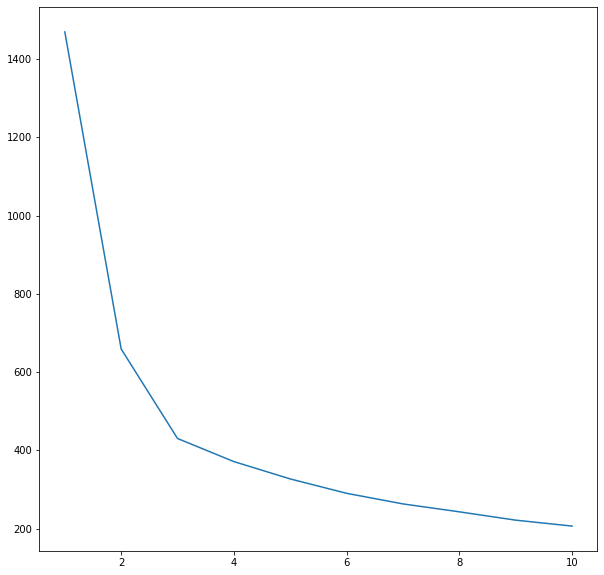

In [39]:
plt.figure(figsize=(10,10))
plt.plot(range(1,11),wss)

As we can Check from the WSS scores and the elbow curve the optimal clusters to the data is 3 using kmeans clustering method.


Finally Creating clustering using KMeans with 3 clusters

In [40]:
K_means=KMeans(n_clusters=3,random_state=1)
K_means.fit(bank_scaled)
K_means.labels_

array([0, 2, 0, 1, 0, 1, 1, 2, 0, 1, 0, 2, 1, 0, 2, 1, 2, 1, 1, 1, 1, 1,
       0, 1, 2, 0, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0,
       1, 1, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 2, 1, 1, 2, 2, 0,
       0, 2, 0, 1, 2, 1, 0, 0, 1, 0, 2, 1, 0, 2, 2, 2, 2, 0, 1, 2, 0, 2,
       0, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0, 2, 0, 2, 0, 0, 1, 1, 0,
       2, 2, 0, 1, 1, 0, 2, 2, 1, 0, 2, 1, 1, 1, 2, 2, 0, 1, 2, 2, 1, 2,
       2, 0, 1, 0, 0, 1, 0, 2, 2, 2, 1, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 2,
       1, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 0,
       2, 1, 2, 1, 2, 2, 2, 2, 0, 0, 1, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1,
       0, 1, 2, 0, 2, 1, 0, 2, 0, 2, 2, 2])

KMeans interia for 3 clusters

In [41]:
K_means.inertia_

430.298481751223

Silhouette score for 3 clusters

In [42]:
silhouette_score(bank_scaled,K_means.labels_)

0.4008059221522216

In [43]:
bank_k=bank.drop('Clusters',axis=1)
bank_k['cluster']=K_means.labels_
bank_k

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,cluster
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,0
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,0
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,1
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,0
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.888000,5.439,3.199,3.986,4.738,2
206,16.77,15.62,0.863800,5.927,3.438,4.920,5.795,0
207,14.03,14.16,0.879600,5.438,3.201,1.717,5.001,2
208,16.12,15.00,0.900000,5.709,3.485,2.270,5.443,2


#### Cluster Profiling

In [44]:
bank_kcluster=bank_k.iloc[:,0:8].groupby('cluster').mean()
bank_kcluster['Freq']=bank_k.cluster.value_counts().sort_index()
bank_kcluster

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
cluster,,,,,,,,
0,18.495373,16.203433,0.884210,6.175687,3.697537,3.632373,6.041701,67
1,11.856944,13.247778,0.848330,5.231750,2.849542,4.733892,5.101722,72
2,14.437887,14.337746,0.881597,5.514577,3.259225,2.707341,5.120803,71


Text(0.5, 1.0, 'Cluster Vs Spending')

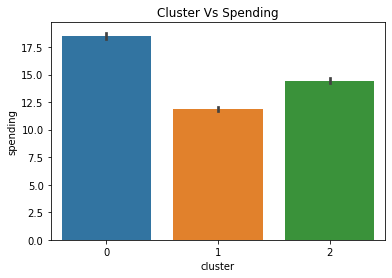

In [45]:
sns.barplot(x="cluster",y='spending',data=bank_k)
plt.title('Cluster Vs Spending')

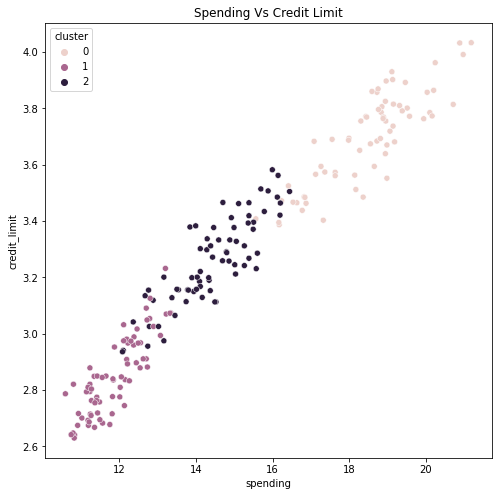

In [46]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='spending',y='credit_limit',hue='cluster',data=bank_k)
plt.title('Spending Vs Credit Limit');

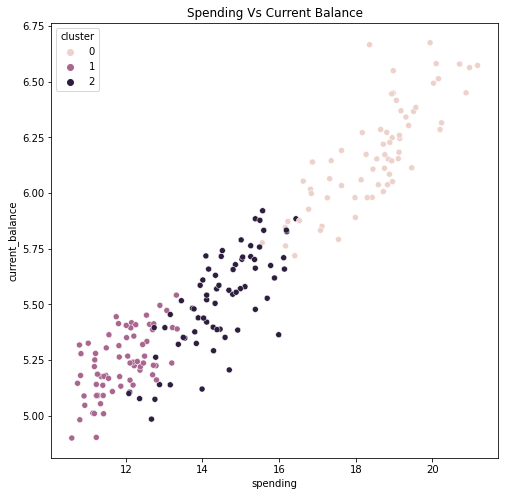

In [47]:
plt.figure(figsize=(8,8))
sns.scatterplot(x='spending',y='current_balance',hue='cluster',data=bank_k,legend=True)
plt.title('Spending Vs Current Balance');

##### 1.5 Describe cluster profiles for the clusters defined. Recommend different promotional strategies for different clusters.

After adding hierarchical clusters to the orignal dataframe because it differentiate the customer much better into different clusters as compare to KMeans clustering.

In [48]:
bank

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Clusters
0,19.94,16.92,0.875200,6.675,3.763,3.252,6.550,1
1,15.99,14.89,0.906400,5.363,3.582,3.336,5.144,2
2,18.95,16.42,0.882900,6.248,3.755,3.368,6.148,1
3,10.83,12.96,0.810588,5.278,2.641,5.182,5.185,3
4,17.99,15.86,0.899200,5.890,3.694,2.068,5.837,1
...,...,...,...,...,...,...,...,...
205,13.89,14.02,0.888000,5.439,3.199,3.986,4.738,2
206,16.77,15.62,0.863800,5.927,3.438,4.920,5.795,1
207,14.03,14.16,0.879600,5.438,3.201,1.717,5.001,2
208,16.12,15.00,0.900000,5.709,3.485,2.270,5.443,2


#### Cluster Profiling

After Clustering the dataframe using both hierarichal and KMeans clustering, we checked that KMeans customer segmentation in not properly done as well as their silhouette score is also low for 3 clusters (0.40). So we moving forward with hierarichal clustering and adding the cluster to the orignal dataframe and performing Cluter profiling.

In [49]:
Cluster_profiling=bank.iloc[:,0:8].groupby('Clusters').mean()
Cluster_profiling['Freq']=bank.Clusters.value_counts().sort_index()
Cluster_profiling

,spending,advance_payments,probability_of_full_payment,current_balance,credit_limit,min_payment_amt,max_spent_in_single_shopping,Freq
Clusters,,,,,,,,
1,18.615873,16.259524,0.883937,6.194603,3.708143,3.659413,6.060952,63
2,14.920164,14.579344,0.881487,5.608033,3.314852,2.684805,5.221951,61
3,12.035465,13.299535,0.854146,5.228395,2.889395,4.443190,5.061814,86


#### Promotinal Stratergies for Customers of Different Clusters

1. Offering Cash Back and Reward Points on New Purchase.

2. Easy EMI option or 0% interest EMI on Big Purchase.

3. Offering loans and other bank sservices to well maintained credit score.

4. Offering cash back or reward points on full payment of credit card for low paying customers.

### Problem 2: CART-RF-ANN

An Insurance firm providing tour insurance is facing higher claim frequency. The management decides to collect data from the past few years. You are assigned the task to make a model which predicts the claim status and provide recommendations to management. Use CART, RF & ANN and compare the models' performances in train and test sets.

2.1 Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

2.3 Performance Metrics: Comment and Check the performance of Predictions on Train and Test sets using Accuracy, Confusion 
Matrix, Plot ROC curve and get ROC_AUC score, classification reports for each model. 

2.4 Final Model: Compare all the models and write an inference which model is best/optimized.

2.5 Inference: Based on the whole Analysis, what are the business insights and recommendations

##### Q-2.1. Read the data, do the necessary initial steps, and exploratory data analysis (Univariate, Bi-variate, and multivariate analysis).

In [50]:
insurance=pd.read_csv('insurance_part2_data-2.csv')

Attribute Information:

1. Target: Claim Status (Claimed)

2. Code of tour firm (Agency_Code)

3. Type of tour insurance firms (Type)

4. Distribution channel of tour insurance agencies (Channel)

5. Name of the tour insurance products (Product)

6. Duration of the tour (Duration in days)

7. Destination of the tour (Destination)

8. Amount worth of sales per customer in procuring tour insurance policies in rupees (in 100’s)

9. The commission received for tour insurance firm (Commission is in percentage of sales)

10. Age of insured (Age)

In [51]:
insurance.head()

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,Airlines,No,0.70,Online,7,2.51,Customised Plan,ASIA
1,36,EPX,Travel Agency,No,0.00,Online,34,20.00,Customised Plan,ASIA
2,39,CWT,Travel Agency,No,5.94,Online,3,9.90,Customised Plan,Americas
3,36,EPX,Travel Agency,No,0.00,Online,4,26.00,Cancellation Plan,ASIA
4,33,JZI,Airlines,No,6.30,Online,53,18.00,Bronze Plan,ASIA


In [52]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Age           3000 non-null   int64  
 1   Agency_Code   3000 non-null   object 
 2   Type          3000 non-null   object 
 3   Claimed       3000 non-null   object 
 4   Commision     3000 non-null   float64
 5   Channel       3000 non-null   object 
 6   Duration      3000 non-null   int64  
 7   Sales         3000 non-null   float64
 8   Product Name  3000 non-null   object 
 9   Destination   3000 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 234.5+ KB


As we can check fro the data information,
1. It has 3000 rows and 10 columns.
2. There are 02-Float64, 02-Int64 and 06-Object types of data present in the data frame.
3. There are no missing values present in the data.
4. As all the feature data type are in order and there is no missing value, There is no annamolies present in the data frame.

In [53]:
insurance.duplicated().sum()

139

There are 139 duplicate row in the dataframe but as this traveling insurance data, same packages could be given to multiple clients. So these will be crucial data for analysis and removing it might impact the performance of the model. 

In [54]:
insurance.describe(include='all')

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
count,3000.000000,3000,3000,3000,3000.000000,3000,3000.000000,3000.000000,3000,3000
unique,NaN,4,2,2,NaN,2,NaN,NaN,5,3
top,NaN,EPX,Travel Agency,No,NaN,Online,NaN,NaN,Customised Plan,ASIA
freq,NaN,1365,1837,2076,NaN,2954,NaN,NaN,1136,2465
mean,38.091000,NaN,NaN,NaN,14.529203,NaN,70.001333,60.249913,NaN,NaN
std,10.463518,NaN,NaN,NaN,25.481455,NaN,134.053313,70.733954,NaN,NaN
min,8.000000,NaN,NaN,NaN,0.000000,NaN,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,0.000000,NaN,11.000000,20.000000,NaN,NaN
50%,36.000000,NaN,NaN,NaN,4.630000,NaN,26.500000,33.000000,NaN,NaN
75%,42.000000,NaN,NaN,NaN,17.235000,NaN,63.000000,69.000000,NaN,NaN


From the above data description:
1. The people travel and take travel insurance have an age range of 08-84 years.
2. Most of customers around 61 % that took travel Insurance are through travel agency.
3. Most of the customer have not claimed any insurance.
4. The average of customers tour duration is around 70 days.
5. The average sales of tour insurance is around 6000.

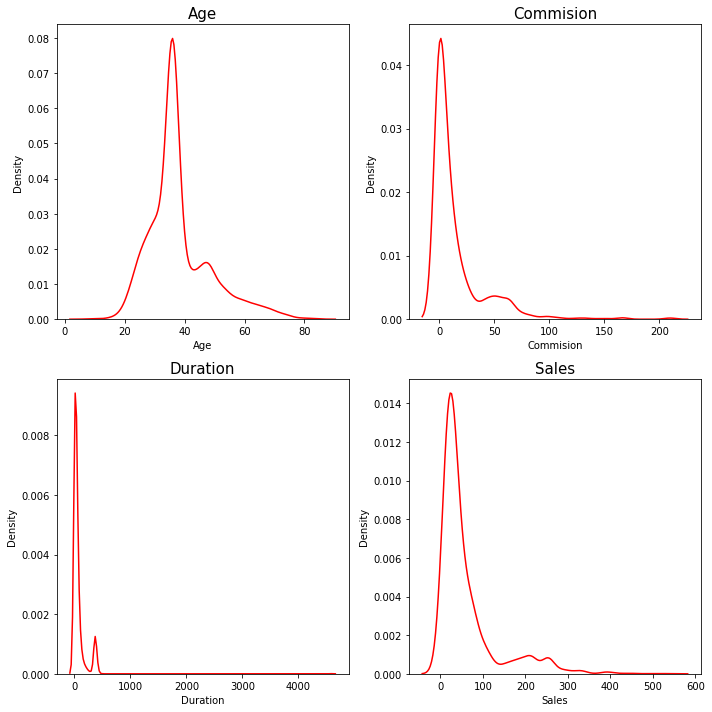

In [55]:
insurance_num=insurance[['Age','Commision','Duration','Sales']]
fig=plt.figure(figsize=(10,10))
for i in range(0,len(insurance_num.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.distplot(insurance_num[insurance_num.columns[i]],hist=False,color='Red')
    ax.set_title(insurance_num.columns[i],color='black',fontdict={'fontsize':15})
plt.tight_layout()
plt.show();
    

In [56]:
print('Skewness of Age is',insurance_num.Age.skew())
print('Skewness of Commision is',insurance_num.Commision.skew())
print('Skewness of Duration is',insurance_num.Duration.skew())
print('Skewness of Sales is',insurance_num.Sales.skew())

Skewness of Age is 1.149712770495169
Skewness of Commision is 3.148857772356885
Skewness of Duration is 13.784681027519602
Skewness of Sales is 2.381148461687274


As we can check from the plot and information that all the numerical columns are highly right skewed.

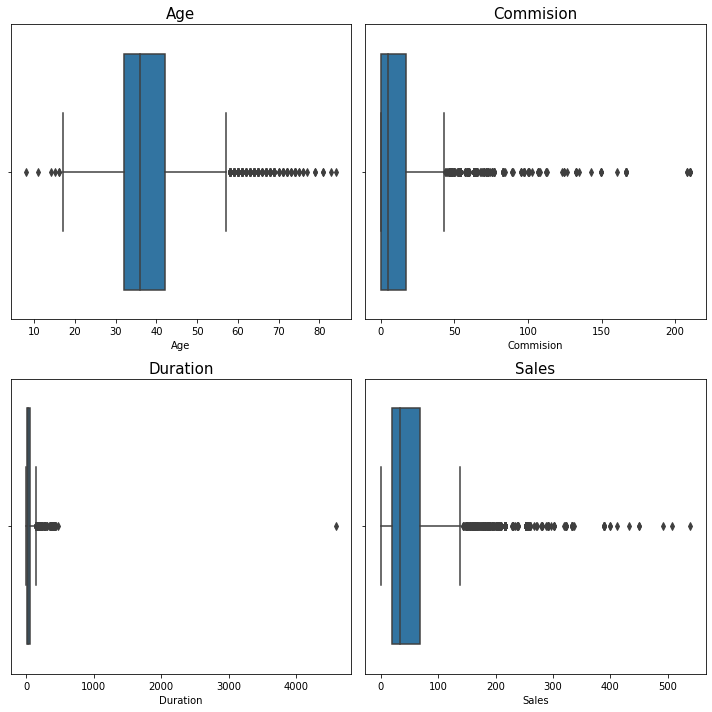

In [57]:
fig=plt.figure(figsize=(10,10))
for i in range(0,len(insurance_num.columns)):
    ax=fig.add_subplot(2,2,i+1)
    sns.boxplot(insurance_num[insurance_num.columns[i]])
    ax.set_title(insurance_num.columns[i],color='black',fontdict={'fontsize':15})
plt.tight_layout()
plt.show();

Above plot shows that there are many outliers present in the data set in each numerical features.

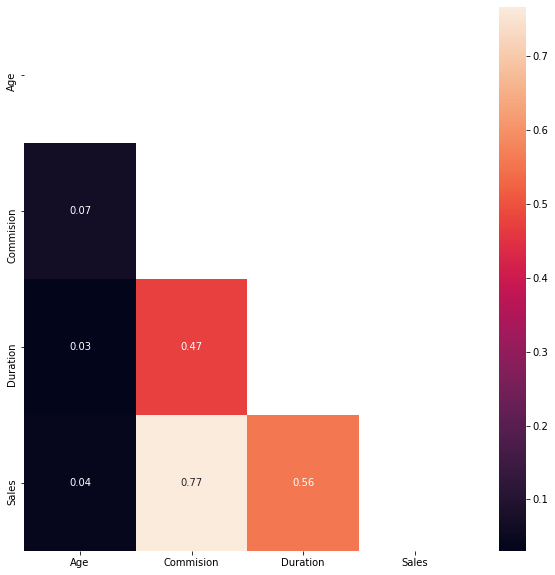

In [58]:
plt.figure(figsize=(10,10))
insurance_corr=insurance.corr(method='pearson')
mask1=np.triu(np.ones_like(insurance_corr,dtype=bool))
sns.heatmap(insurance_corr,annot=True,fmt='0.2f',mask=mask1);

As we can check from the above correlation plot that there are not much correlation present in the data set, Only Sales to commision and sales to duration are positively correlated. As higher the sales higher the commision and longer the duration of the tour higher the sales.

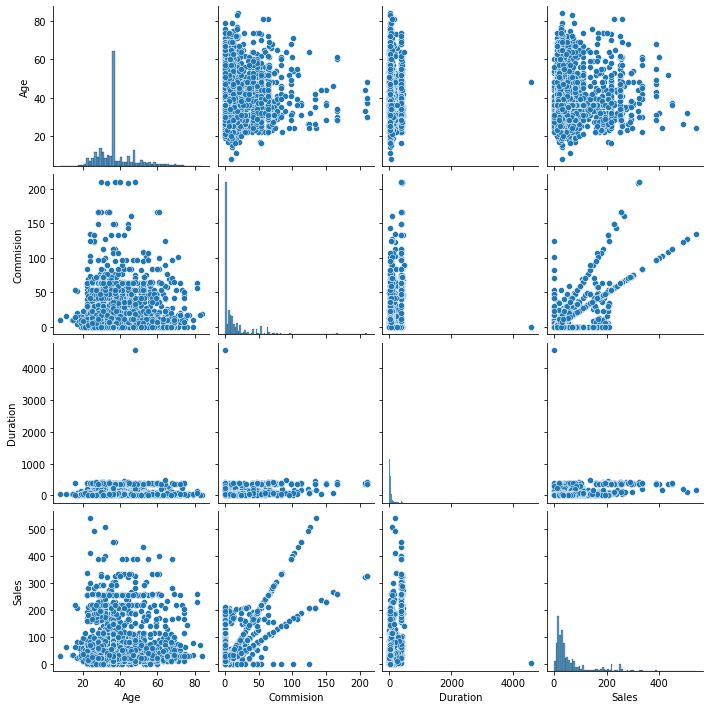

In [59]:
sns.pairplot(insurance)

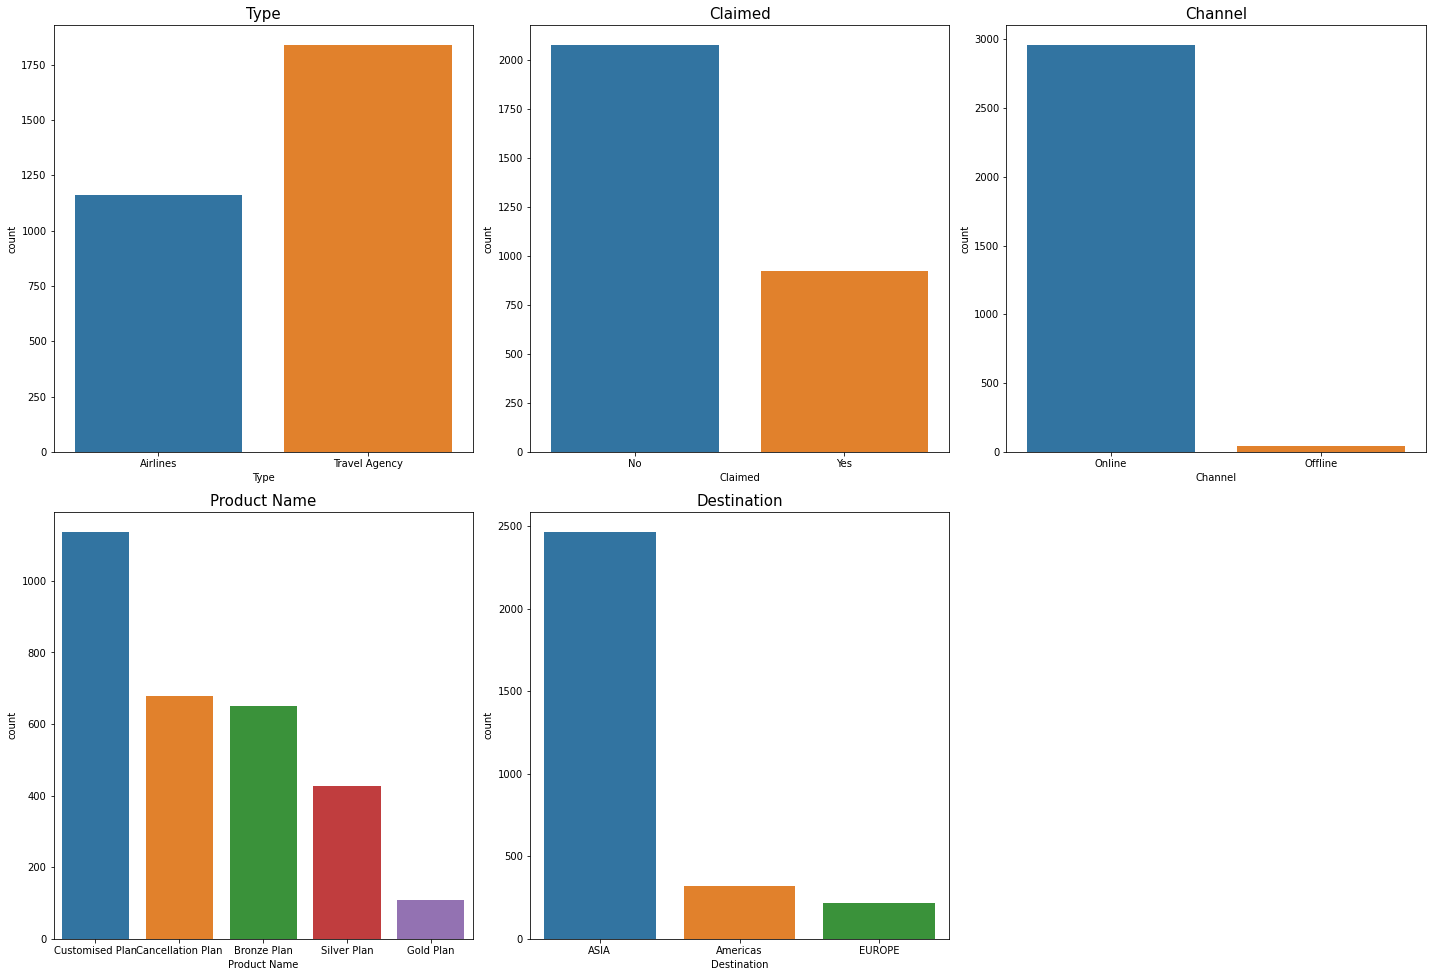

In [60]:
insursurance_obj=insurance[['Type','Claimed','Channel','Product Name','Destination']]
fig=plt.figure(figsize=(20,20))
for i in range(0,len(insursurance_obj.columns)):
    ax=fig.add_subplot(3,3,i+1)
    sns.countplot(insursurance_obj[insursurance_obj.columns[i]])
    ax.set_title(insursurance_obj.columns[i],color='black',fontdict={'fontsize':15})
plt.tight_layout()
plt.show();

From the above we can easily interpret that :
1. Travel agency are preffered more of travel insurance rather than airline.
2. Online platforms are most used for purchasing travel insurance for the tour.
3. Most Customer prefer customized plan for their insurance while traveling and after that cancellation plan.
4. Asia is the most preffered or liked destionation for travelling.

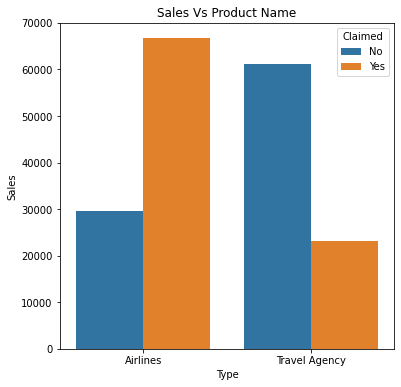

In [61]:
plt.figure(figsize=(6,6))
sns.barplot(x='Type',y='Sales',hue='Claimed',data=insurance,ci=None,estimator=sum)
plt.title('Sales Vs Product Name');

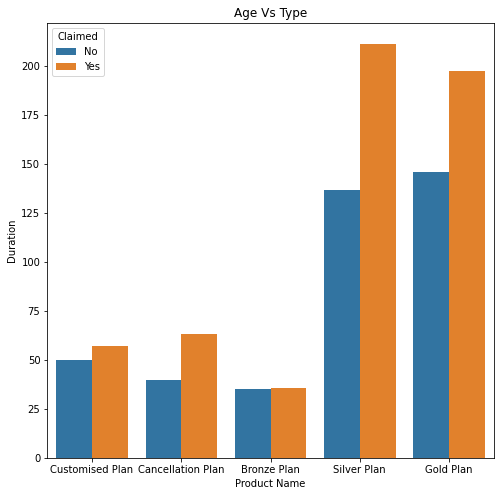

In [62]:
plt.figure(figsize=(8,8))
sns.barplot(x='Product Name',y='Duration',hue='Claimed',data=insurance,ci=None)
plt.title('Age Vs Type');

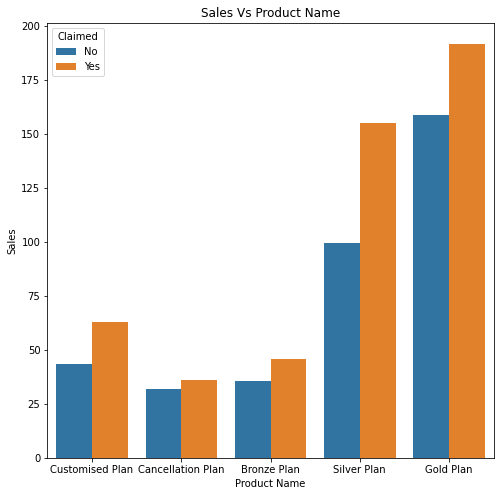

In [63]:
plt.figure(figsize=(8,8))
sns.barplot(x='Product Name',y='Sales',hue='Claimed',data=insurance,ci=None)
plt.title('Sales Vs Product Name');

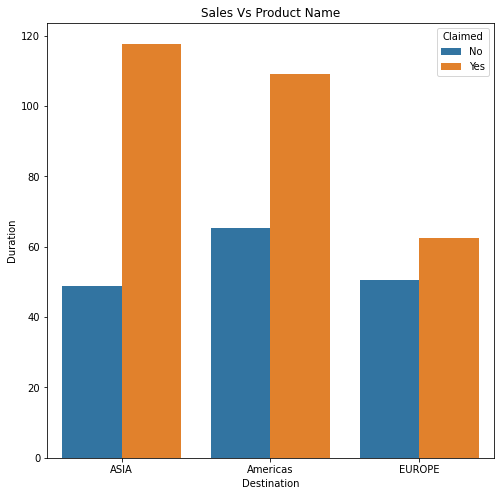

In [64]:
plt.figure(figsize=(8,8))
sns.barplot(x='Destination',y='Duration',hue='Claimed',data=insurance,ci=None)
plt.title('Sales Vs Product Name');

##### Q-2.2 Data Split: Split the data into test and train, build classification model CART, Random Forest, Artificial Neural Network

In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score,roc_curve

Converting Object datatypes into integer

In [66]:
for column in insurance[['Type','Claimed','Channel','Product Name','Destination']]:
    if insurance[column].dtype=='object':
        insurance[column]=pd.Categorical(insurance[column]).codes
insurance.head()
    

,Age,Agency_Code,Type,Claimed,Commision,Channel,Duration,Sales,Product Name,Destination
0,48,C2B,0,0,0.70,1,7,2.51,2,0
1,36,EPX,1,0,0.00,1,34,20.00,2,0
2,39,CWT,1,0,5.94,1,3,9.90,2,1
3,36,EPX,1,0,0.00,1,4,26.00,1,0
4,33,JZI,0,0,6.30,1,53,18.00,0,0


Spliting the data into train and test samples. 

Agency code is just the codes that have been assigned to different packages to dropping the Agency code feature fro the data frame as it has no further use in building model.

In [67]:
insurance.Claimed.value_counts(normalize=True)

0    0.692
1    0.308
Name: Claimed, dtype: float64

As we can check this is an balanced dataset

In [68]:
X=insurance.drop(['Agency_Code','Claimed'],axis=1)
y=insurance.pop('Claimed')

In [69]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [70]:
print('X_train',X_train.shape)
print('X_test',X_test.shape)
print('y_train',y_train.shape)
print('y_test',y_test.shape)

X_train (2100, 8)
X_test (900, 8)
y_train (2100,)
y_test (900,)


#### Creating Decision Tree Model

In [71]:
dt_model=DecisionTreeClassifier(criterion='gini')

In [72]:
dt_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [73]:
param_grid = {
    'max_depth': [10,12,15],
    'min_samples_leaf': [30,50],
    'min_samples_split': [100,150]
}
dt_model=DecisionTreeClassifier(random_state=1)
grid_search=GridSearchCV(estimator=dt_model,param_grid=param_grid,cv=10)

In [74]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [10, 12, 15],
                         'min_samples_leaf': [30, 50],
                         'min_samples_split': [100, 150]})

In [75]:
grid_search.best_params_

{'max_depth': 10, 'min_samples_leaf': 30, 'min_samples_split': 100}

In [76]:
dt_best=grid_search.best_estimator_

In [77]:
ytrain_predict_dt=dt_best.predict(X_train)
ytest_predict_dt=dt_best.predict(X_test)

<AxesSubplot:>

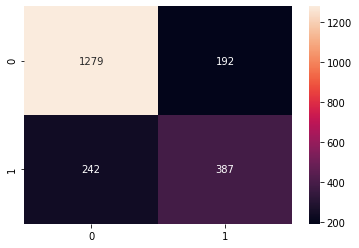

In [117]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_dt),annot=True,fmt='0.0f')

In [79]:
accuracy_score(y_train,ytrain_predict_dt)

0.7933333333333333

In [80]:
print(classification_report(y_train,ytrain_predict_dt))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1471
           1       0.67      0.62      0.64       629

    accuracy                           0.79      2100
   macro avg       0.75      0.74      0.75      2100
weighted avg       0.79      0.79      0.79      2100



<AxesSubplot:>

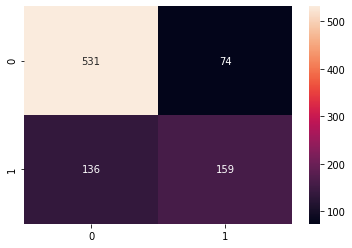

In [118]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_dt),annot= True,fmt='0.0f')

In [82]:
accuracy_score(y_test,ytest_predict_dt)

0.7666666666666667

In [83]:
print(classification_report(y_test,ytest_predict_dt))

              precision    recall  f1-score   support

           0       0.80      0.88      0.83       605
           1       0.68      0.54      0.60       295

    accuracy                           0.77       900
   macro avg       0.74      0.71      0.72       900
weighted avg       0.76      0.77      0.76       900



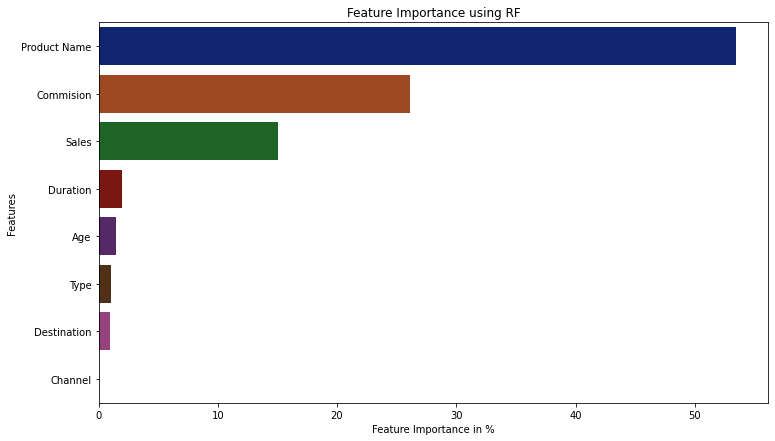

In [84]:
imp=pd.DataFrame(dt_best.feature_importances_*100, index = X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(imp[0],imp.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show();


#### ROC CURVE AND SCORE

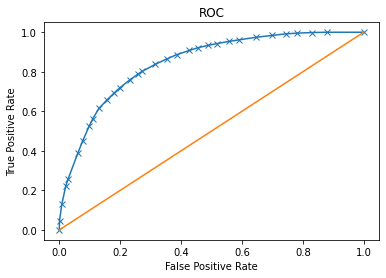

Area under Curve is 0.8444813830505836


In [85]:
rf_fpr, rf_tpr,_=roc_curve(y_train,dt_best.predict_proba(X_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,dt_best.predict_proba(X_train)[:,1]))

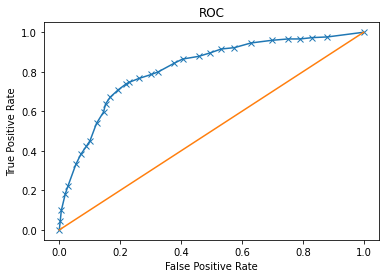

Area under Curve is 0.8149488723910912


In [86]:
rf_fpr, rf_tpr,_=roc_curve(y_test,dt_best.predict_proba(X_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,dt_best.predict_proba(X_test)[:,1]))

#### Creating Random Forest Model

In [87]:
Rf_model=RandomForestClassifier(n_estimators=501,random_state=1)

In [88]:
Rf_model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=501, random_state=1)

In [89]:
param_grid={
    'max_depth': [10,13],
    'max_features': [5],
    'min_samples_leaf': [30,50],
    'min_samples_split': [100,150],
    'n_estimators': [301,501]
    
}
Rf_model=RandomForestClassifier(random_state=1)
grid_search=GridSearchCV(estimator=Rf_model,param_grid=param_grid,cv=5)

In [90]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [10, 13], 'max_features': [5],
                         'min_samples_leaf': [30, 50],
                         'min_samples_split': [100, 150],
                         'n_estimators': [301, 501]})

In [91]:
grid_search.best_params_

{'max_depth': 10,
 'max_features': 5,
 'min_samples_leaf': 30,
 'min_samples_split': 100,
 'n_estimators': 501}

In [92]:
Rf_best=grid_search.best_estimator_

In [93]:
ytrain_predict_Rf=Rf_best.predict(X_train)
ytest_predict_Rf=Rf_best.predict(X_test)

<AxesSubplot:>

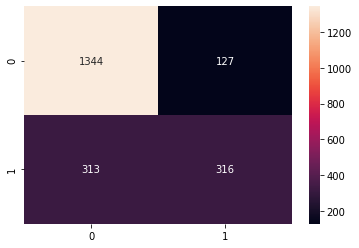

In [119]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_Rf),annot=True,fmt='0.0f')

<AxesSubplot:>

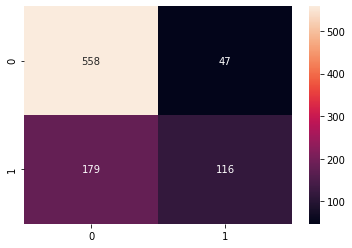

In [120]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_Rf),annot=True,fmt='0.0f')

In [96]:
accuracy_score(y_train,ytrain_predict_Rf)

0.7904761904761904

In [97]:
accuracy_score(y_test,ytest_predict_Rf)

0.7488888888888889

In [98]:
print(classification_report(y_train,ytrain_predict_Rf))
print('')
print(classification_report(y_test,ytest_predict_Rf))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86      1471
           1       0.71      0.50      0.59       629

    accuracy                           0.79      2100
   macro avg       0.76      0.71      0.72      2100
weighted avg       0.78      0.79      0.78      2100


              precision    recall  f1-score   support

           0       0.76      0.92      0.83       605
           1       0.71      0.39      0.51       295

    accuracy                           0.75       900
   macro avg       0.73      0.66      0.67       900
weighted avg       0.74      0.75      0.73       900



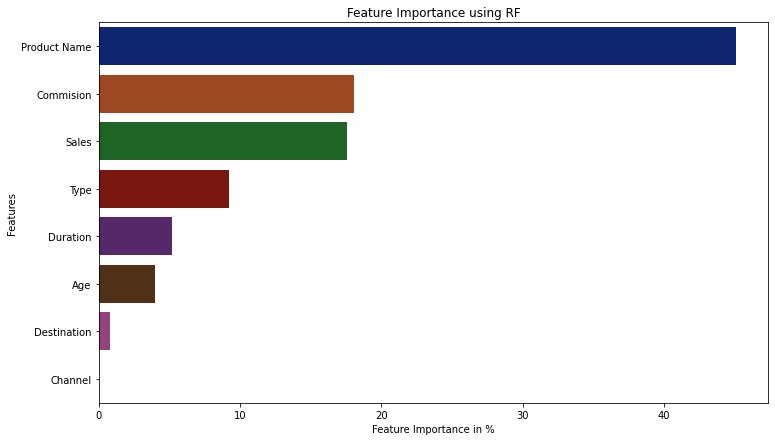

In [99]:
x=pd.DataFrame(Rf_best.feature_importances_*100,index=X_train.columns).sort_values(by=0,ascending=False)
plt.figure(figsize=(12,7))
sns.barplot(x[0],x.index,palette='dark')
plt.xlabel('Feature Importance in %')
plt.ylabel('Features')
plt.title('Feature Importance using RF')
plt.show()

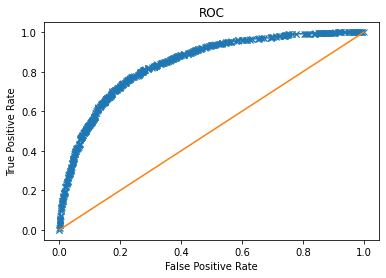

Area under Curve is 0.8428445440682013


In [100]:
rf_fpr, rf_tpr,_=roc_curve(y_train,Rf_best.predict_proba(X_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,Rf_best.predict_proba(X_train)[:,1]))

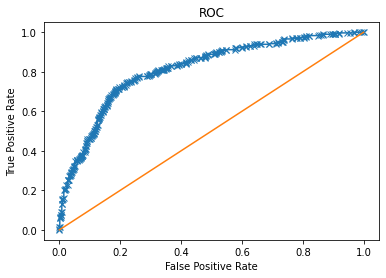

Area under Curve is 0.8136405659055891


In [101]:
rf_fpr, rf_tpr,_=roc_curve(y_test,Rf_best.predict_proba(X_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,Rf_best.predict_proba(X_test)[:,1]))

#### Creating Arifitial Neural Network Model

In [102]:
param_grid = {
    'hidden_layer_sizes': [500,600],
    'max_iter': [5000],
    'solver': ['adam','sgd'],
    'tol': [0.001],
}

mlp_model = MLPClassifier(random_state=1)

grid_search = GridSearchCV(estimator = mlp_model, param_grid = param_grid, cv = 10)

In [103]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=MLPClassifier(random_state=1),
             param_grid={'hidden_layer_sizes': [500, 600], 'max_iter': [5000],
                         'solver': ['adam', 'sgd'], 'tol': [0.001]})

In [104]:
grid_search.best_params_

{'hidden_layer_sizes': 600, 'max_iter': 5000, 'solver': 'sgd', 'tol': 0.001}

In [105]:
mlp_best=grid_search.best_estimator_

In [106]:
ytrain_predict_mlp=mlp_best.predict(X_train)
ytest_predict_mlp=mlp_best.predict(X_test)

<AxesSubplot:>

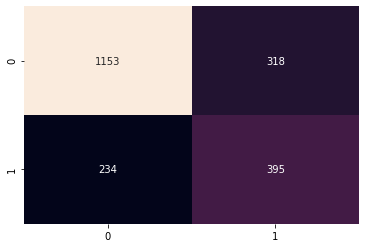

In [123]:
sns.heatmap(confusion_matrix(y_train,ytrain_predict_mlp),annot=True,fmt='0.0f',cbar=None)

<AxesSubplot:>

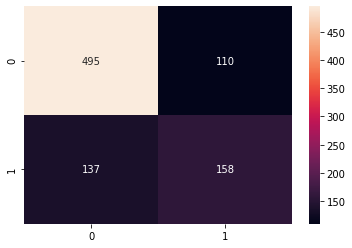

In [122]:
sns.heatmap(confusion_matrix(y_test,ytest_predict_mlp),annot=True,fmt='0.0f')

In [109]:
accuracy_score(y_train,ytrain_predict_mlp)

0.7371428571428571

In [110]:
accuracy_score(y_test,ytest_predict_mlp)

0.7255555555555555

In [111]:
print(classification_report(y_train,ytrain_predict_mlp))
print('')
print(classification_report(y_test,ytest_predict_mlp))

              precision    recall  f1-score   support

           0       0.83      0.78      0.81      1471
           1       0.55      0.63      0.59       629

    accuracy                           0.74      2100
   macro avg       0.69      0.71      0.70      2100
weighted avg       0.75      0.74      0.74      2100


              precision    recall  f1-score   support

           0       0.78      0.82      0.80       605
           1       0.59      0.54      0.56       295

    accuracy                           0.73       900
   macro avg       0.69      0.68      0.68       900
weighted avg       0.72      0.73      0.72       900



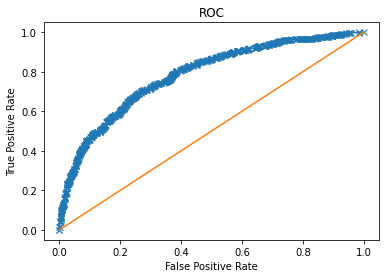

Area under Curve is 0.7834795446464179


In [112]:
rf_fpr, rf_tpr,_=roc_curve(y_train,mlp_best.predict_proba(X_train)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_train,mlp_best.predict_proba(X_train)[:,1]))

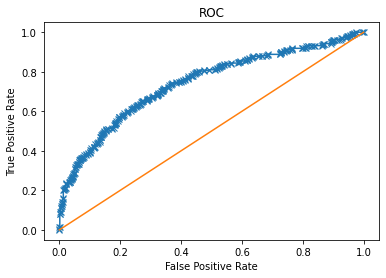

Area under Curve is 0.7424653312788906


In [113]:
rf_fpr, rf_tpr,_=roc_curve(y_test,mlp_best.predict_proba(X_test)[:,1])
plt.plot(rf_fpr,rf_tpr, marker='x', label='NN')
plt.plot(np.arange(0,1.1,0.1),np.arange(0,1.1,0.1))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.show()
print('Area under Curve is', roc_auc_score(y_test,mlp_best.predict_proba(X_test)[:,1]))